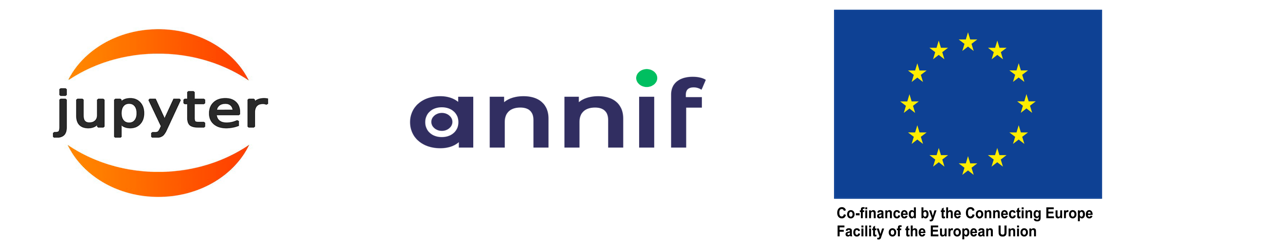

# Annif tutorial with Jupyter notebook

[Annif](https://annif.org/) is an open source  subject indexing tool for new documents and aims to improve the discoverability of vast amount of electronic documents. 

In order to accomplish automatic subject indexing task, annif uses ML/NLP algorithms to leverage existing training data in the form of subject vocabulary and metadata. For the purpose of a test use-case service of Annif at CSC, small subsets of yso-finna-theses records (i.e., yso-finna-small.tsv.gz file as provided by Annif tutorial dataset) from the [Finna.fi](https://www.finna.fi/?lng=en-gb) discovery serviceis are used. The backend models of this annif instance inculdes handful of different subject indexing algorithms namely, Maui, TF-IDF, ensemble and Omikuji (Parabel/Bonsai) methods. These models are trained in supercomputing (Puhti) environment using singularity container for Annif application. 

This tutorial uses REST API calls to interact with a given Annif webserver which can be either [Annif webserver](https://api.annif.org/v1/ui/) hosted by national library of Finland  or a [test case webserver](https://annif.rahtiapp.fi/v1/ui/) hosted by CSC 

## Learning Objectives
Upon completion of this tutorial, you will be able to learn how to:
 -  List available trained projects in a given annif webserver
 -  Perform subject indexing with Annif using different projects (subject vocabularies and existing metadata)

## List all available projects from a given annif webserver
All available projects form annif webserver can be retrieved using Annif REST API GET call.
 
>**Note**: One can make REST API call using the following *curl* command in command-line environment: curl -X GET --header 'Accept: application/json' 'https://annif.rahtiapp.fi/v1/projects'   

Below is the python way of making REST API GET call to annif server and then converting the resulting json data in the form of a table

In [145]:
import requests
import json 
from pandas import json_normalize
headers = {'Accept': 'application/json'}
base_url='https://annif.rahtiapp.fi/v1/projects' # Annif webserver hosted by CSC 
#base_url='https://api.annif.org/v1/projects' # Annif webserver by NatLibFi

response = requests.get(base_url, headers=headers)
d=response.json() # print resulting json file: print(response.text) 
json_normalize(d['projects'])

,is_trained,language,modification_time,name,project_id,backend.backend_id
0,True,en,2020-05-30T21:21:56+00:00,YSO TFIDF project,yso-tfidf-en,tfidf
1,True,en,2020-05-31T12:06:45.718000+00:00,YSO ensemble project,yso-ensemble-en,ensemble
2,True,en,2020-05-31T12:06:45.718000+00:00,YSO Maui project,yso-maui-en,maui
3,True,en,2020-05-30T21:07:05+00:00,YSO Omikuji Parabel English,yso-omikuji-parabel-en,omikuji
4,True,en,2020-05-30T21:07:00+00:00,YSO Omikuji Bonsai English,yso-omikuji-bonsai-en,omikuji
5,True,en,2020-06-01T19:00:24+00:00,YSO neural ensemble project,yso-nn-ensemble-en,nn_ensemble


## Perform subject indexing with Annif
There are mainly six types of projects in a test case example of [Annif](https://annif.rahtiapp.fi) hosted at CSC and it runs
on Rahti container cloud. Let's see how to get subject indexing with each of these projects here

### 1. Perform subject indexing for your own text using YSO TFIDF project (projectid: yso-tfidf-en) 
This can be accomplished using swagger API POST call
> **Note**: Here is the curl command for subject indexing: curl -X POST --header 'Content-Type: application/x-www-form-urlencoded' --header 'Accept: application/json' -d 'text=frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary&limit=10' 'https://annif.rahtiapp.fi/v1/projects/yso-tfidf-en/suggest'

Below is the python approach:

,label,notation,score,uri
0,modal realism,None,0.281034,http://www.yso.fi/onto/yso/p25273
1,vocabulary (knowledge),None,0.241619,http://www.yso.fi/onto/yso/p21233
2,glossaries,None,0.212135,http://www.yso.fi/onto/yso/p7407
3,documents,None,0.197921,http://www.yso.fi/onto/yso/p2325
4,terminology,None,0.197429,http://www.yso.fi/onto/yso/p1346
5,documentation,None,0.189662,http://www.yso.fi/onto/yso/p16361
6,Lule Sami language,None,0.188009,http://www.yso.fi/onto/yso/p28656
7,matchstick industry,None,0.181447,http://www.yso.fi/onto/yso/p16276
8,words,None,0.175842,http://www.yso.fi/onto/yso/p3291
9,interest rate hedging,None,0.166001,http://www.yso.fi/onto/yso/p25157


<AxesSubplot:xlabel='label'>

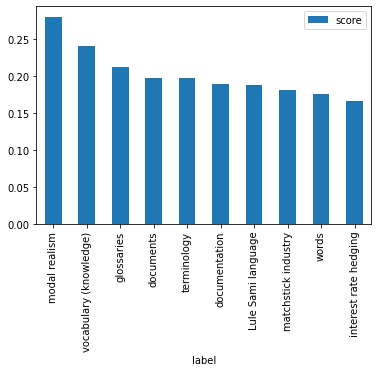

In [152]:
projectid='yso-tfidf-en'
text='frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary'
url= base_url+ '/' + projectid +'/suggest'
data = {'text': text} 
headers = {'Content-Type': 'application/x-www-form-urlencoded','Accept': 'application/json'}

response = requests.post(url, headers=headers, data=data)
d=response.json()  # print(response.text) 
display(json_normalize(d['results']))
data=json_normalize(d['results'])
data.loc[:,['label','score','uri']].plot('label',kind='bar')

### 2. Perform subject indexing with  YSO ensemble project (projectid:'yso-ensemble-en') 
This  can be accomplished using swagger API POST call
> **Note**: curl command - curl -X POST --header 'Content-Type: application/x-www-form-urlencoded' --header 'Accept: application/json' -d 'text=frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary&limit=10' 'https://annif.rahtiapp.fi/v1/projects/yso-tfidf-en/suggest'

Using python: 

,label,notation,score,uri
0,documents,None,0.143312,http://www.yso.fi/onto/yso/p2325
1,modal realism,None,0.093678,http://www.yso.fi/onto/yso/p25273
2,vocabulary (knowledge),None,0.080540,http://www.yso.fi/onto/yso/p21233
3,terminology,None,0.075918,http://www.yso.fi/onto/yso/p1346
4,glossaries,None,0.070712,http://www.yso.fi/onto/yso/p7407
5,documentation,None,0.063221,http://www.yso.fi/onto/yso/p16361
6,Lule Sami language,None,0.062670,http://www.yso.fi/onto/yso/p28656
7,matchstick industry,None,0.060482,http://www.yso.fi/onto/yso/p16276
8,words,None,0.058614,http://www.yso.fi/onto/yso/p3291
9,interest rate hedging,None,0.055334,http://www.yso.fi/onto/yso/p25157


<AxesSubplot:xlabel='label'>

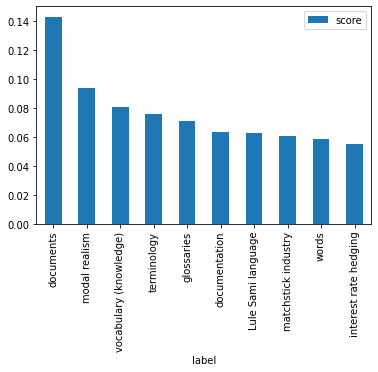

In [153]:
projectid='yso-ensemble-en'
text='frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary'
url= base_url+ '/' + projectid +'/suggest'
data = {'text': text} 
headers = {'Content-Type': 'application/x-www-form-urlencoded','Accept': 'application/json'}

response = requests.post(url, headers=headers, data=data)
d=response.json()  # print(response.text) 
display(json_normalize(d['results']))
data=json_normalize(d['results'])
data.loc[:,['label','score','uri']].plot('label',kind='bar')

### 3. Perform subject indexing with for your own text using project 'yso-maui-en' 
This  can be accomplished using swagger API POST call
> **curl command**:curl -X POST --header 'Content-Type: application/x-www-form-urlencoded' --header 'Accept: application/json' -d 'text=frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary&limit=10' 'https://annif.rahtiapp.fi/v1/projects/yso-maui-en/suggest'
    
Using python approach:

,label,notation,score,uri
0,documents,None,0.116008,http://www.yso.fi/onto/yso/p2325
1,becoming more common,None,0.038068,http://www.yso.fi/onto/yso/p28134
2,occurence,None,0.033984,http://www.yso.fi/onto/yso/p21428
3,combining,None,0.015163,http://www.yso.fi/onto/yso/p21164
4,semesters,None,0.015163,http://www.yso.fi/onto/yso/p15046
5,terminology,None,0.015163,http://www.yso.fi/onto/yso/p1346


<AxesSubplot:xlabel='label'>

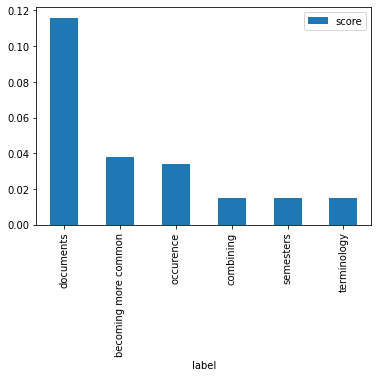

In [154]:
projectid='yso-maui-en'
text='frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary'
url= base_url+ '/' + projectid +'/suggest'
data = {'text': text} 
headers = { 'Content-Type': 'application/x-www-form-urlencoded','Accept': 'application/json'}
response = requests.post(url, headers=headers, data=data)

d=response.json()  # print(response.text) 
display(json_normalize(d['results']))
data=json_normalize(d['results'])
data.loc[:,['label','score','uri']].plot('label',kind='bar')

### 4. Perform subject indexing for your own text using project 'yso-omikuji-parabel-en' 
This  can be accomplished using swagger API POST call
>**curl command**: curl -X POST --header 'Content-Type: application/x-www-form-urlencoded' --header 'Accept: application/json' -d 'text=frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary&limit=10' 'https://annif.rahtiapp.fi/v1/projects/yso-omikuji-parabel-en/suggest'

Using python approach:

,label,notation,score,uri
0,English language,None,0.294089,http://www.yso.fi/onto/yso/p2573
1,terminology,None,0.115093,http://www.yso.fi/onto/yso/p1346
2,glossaries,None,0.033253,http://www.yso.fi/onto/yso/p7407
3,words,None,0.030402,http://www.yso.fi/onto/yso/p3291
4,lexicology,None,0.028439,http://www.yso.fi/onto/yso/p5183
5,concepts (notions),None,0.009160,http://www.yso.fi/onto/yso/p2267
6,fine arts,None,0.009129,http://www.yso.fi/onto/yso/p2739
7,dictionaries,None,0.008678,http://www.yso.fi/onto/yso/p5184
8,art,None,0.007653,http://www.yso.fi/onto/yso/p2851
9,English setter,None,0.007068,http://www.yso.fi/onto/yso/p23630


<AxesSubplot:xlabel='label'>

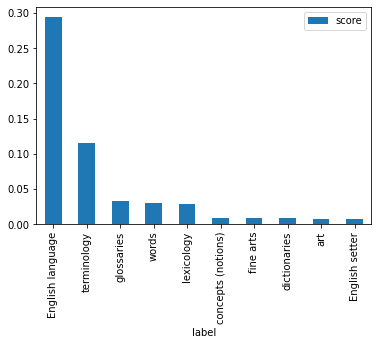

In [155]:
projectid='yso-omikuji-parabel-en'
text='frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary'
url= base_url+ '/' + projectid +'/suggest'
data = {'text': text} 
headers = {'Content-Type': 'application/x-www-form-urlencoded','Accept': 'application/json'}
response = requests.post(url, headers=headers, data=data)

d=response.json()  # print(response.text) 
display(json_normalize(d['results']))
data=json_normalize(d['results'])
data.loc[:,['label','score','uri']].plot('label',kind='bar')

### 5. Perform subject indexing for your own text using project 'yso-omikuji-bonsai-en' 
This  can be accomplished using swagger API POST call
>**curl command**:curl -X POST --header 'Content-Type: application/x-www-form-urlencoded' --header 'Accept: application/json' -d 'text=frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary&limit=10' 'https://annif.rahtiapp.fi/v1/projects/yyso-omikuji-bonsai-en/suggest'

Using python approach:

,label,notation,score,uri
0,English language,None,0.317434,http://www.yso.fi/onto/yso/p2573
1,terminology,None,0.097765,http://www.yso.fi/onto/yso/p1346
2,lexicology,None,0.078270,http://www.yso.fi/onto/yso/p5183
3,words,None,0.059674,http://www.yso.fi/onto/yso/p3291
4,Finnish language,None,0.023988,http://www.yso.fi/onto/yso/p8856
5,dictionaries,None,0.021530,http://www.yso.fi/onto/yso/p5184
6,documentation,None,0.009713,http://www.yso.fi/onto/yso/p16361
7,glossaries,None,0.007461,http://www.yso.fi/onto/yso/p7407
8,Finland,None,0.006363,http://www.yso.fi/onto/yso/p94426
9,climate,None,0.006337,http://www.yso.fi/onto/yso/p5639


<AxesSubplot:xlabel='label'>

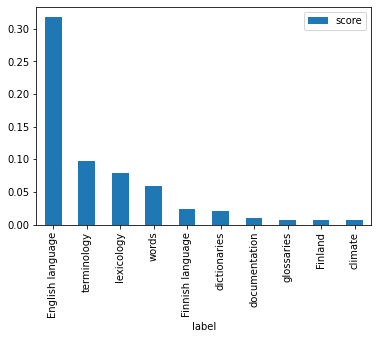

In [156]:
projectid='yso-omikuji-bonsai-en'
text='frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary'
url= base_url+ '/' + projectid +'/suggest'
data = {'text': text} 
headers = {'Content-Type': 'application/x-www-form-urlencoded','Accept': 'application/json'}

response = requests.post(url, headers=headers, data=data)
d=response.json()  # print(response.text) 
display(json_normalize(d['results']))
data=json_normalize(d['results'])
data.loc[:,['label','score','uri']].plot('label',kind='bar')

### 6. Perform subject indexing for your own text using  project 'yso-nn-ensemble-en' 
This  can be accomplished using swagger API POST call
>**curl command**: curl -X POST --header 'Content-Type: application/x-www-form-urlencoded' --header 'Accept: application/json' -d 'text=frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary&limit=10' 'https://annif.rahtiapp.fi/v1/projects/yso-nn-ensemble-en/suggest'

Using python approach:

,label,notation,score,uri
0,documents,None,0.214969,http://www.yso.fi/onto/yso/p2325
1,modal realism,None,0.140517,http://www.yso.fi/onto/yso/p25273
2,terminology,None,0.113878,http://www.yso.fi/onto/yso/p1346
3,glossaries,None,0.106067,http://www.yso.fi/onto/yso/p7407
4,documentation,None,0.094831,http://www.yso.fi/onto/yso/p16361
5,Lule Sami language,None,0.094005,http://www.yso.fi/onto/yso/p28656
6,matchstick industry,None,0.090723,http://www.yso.fi/onto/yso/p16276
7,referral to treatment,None,0.077346,http://www.yso.fi/onto/yso/p9722
8,long-term planning,None,0.075344,http://www.yso.fi/onto/yso/p14916
9,permit of residence,None,0.074752,http://www.yso.fi/onto/yso/p6464


<AxesSubplot:xlabel='label'>

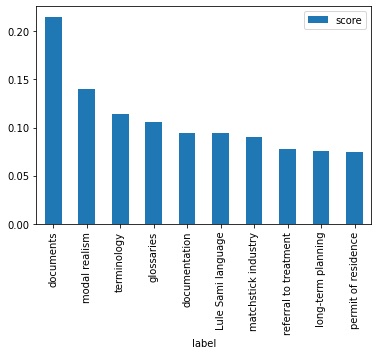

In [151]:
projectid='yso-nn-ensemble-en'
text='frequently occurring or otherwise salient terms in the document are matched with terms in the vocabulary'
url= base_url+ '/' + projectid +'/suggest'
data = {'text': text} 
headers = { 'Content-Type': 'application/x-www-form-urlencoded','Accept': 'application/json'}
response = requests.post(url, headers=headers, data=data)

d=response.json() 
display(json_normalize(d['results']))
data=json_normalize(d['results'])
data.loc[:,['label','score','uri']].plot('label',kind='bar')

##  References

1 Suominen, O., 2019. Annif: DIY automated subject indexing using multiple algorithms. LIBER Quarterly, 29(1), pp.1–25

2 Annif github repositories: [CSC github](https://github.com/CSCfi/annif-utils) and [NatLibFi github](https://github.com/NatLibFi/Annif)
